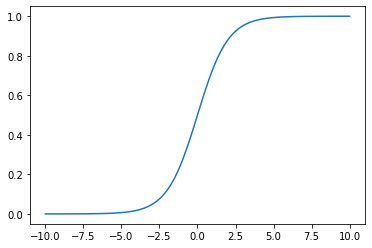

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# #### Not used here
# import argparse

def sigmoid_activation(x):
#     compute the sigmoid activation value for a given input
    return 1/(1+np.exp(-x))

inp=np.linspace(-10,10,100)
plt.plot(inp,sigmoid_activation(inp))
plt.show()

def predict(x,w):
    preds=sigmoid_activation(x.dot(w))
    preds[preds<=0.5]=0
    preds[preds>0]=1
    
    return preds

In [2]:

args={'epochs':100,'alpha':0.01}


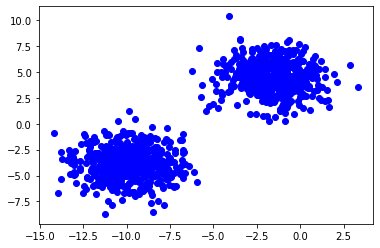

In [3]:
(x,y)=make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1.5,random_state=1)
y=y.reshape((y.shape[0],1))
plt.scatter(x[:,0],x[:,1],color="blue")
plt.show()
x=np.c_[x,np.ones((x.shape[0]))]
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.5,random_state=42)

In [13]:
# initialise our weight matrix and list of losses
print("[INFO] training...")
W=np.random.randn(x.shape[1],1)
losses=[]
for epoch in np.arange(0,args["epochs"]):
    preds=sigmoid_activation(trainx.dot(W))
    error=preds-trainy
    loss=np.sum(error**2)
    losses.append(loss)
    gradient =trainx.T.dot(error)
    W+=-args["alpha"]*gradient 
    #check if see if an update should be displayed
    if epoch==0 or (epoch+1)%5==0:
        print("[INFO] epoch={},loss={:.7f}".format(int(epoch+1),loss))
preds=predict(testx,W)
print(classification_report(testy,preds))
cm=confusion_matrix(testy,preds)

[INFO] training...
[INFO] epoch=1,loss=320.9601167
[INFO] epoch=5,loss=14.4911246
[INFO] epoch=10,loss=10.9737141
[INFO] epoch=15,loss=7.1520831
[INFO] epoch=20,loss=6.9827532
[INFO] epoch=25,loss=6.9154005
[INFO] epoch=30,loss=5.9636706
[INFO] epoch=35,loss=3.9146709
[INFO] epoch=40,loss=2.5134559
[INFO] epoch=45,loss=1.4335574
[INFO] epoch=50,loss=1.0211641
[INFO] epoch=55,loss=0.8794021
[INFO] epoch=60,loss=0.6366080
[INFO] epoch=65,loss=0.3573141
[INFO] epoch=70,loss=0.1811713
[INFO] epoch=75,loss=0.0971225
[INFO] epoch=80,loss=0.0574027
[INFO] epoch=85,loss=0.0370740
[INFO] epoch=90,loss=0.0257109
[INFO] epoch=95,loss=0.0188550
[INFO] epoch=100,loss=0.0144509
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



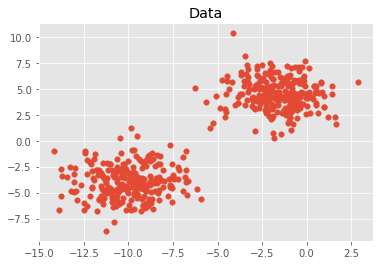

In [14]:
# Plot the classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testx[:,0],testx[:,1],marker="o",s=30)

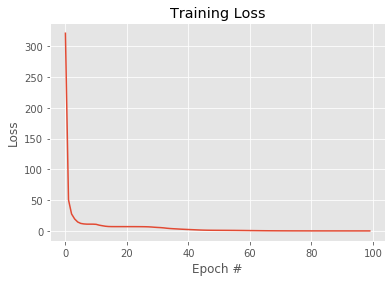

In [15]:
# Construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,args["epochs"]),losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()